In [3]:
import numpy as np
from numpy import zeros
import cv2 as cv
import array as arr
from matplotlib import pyplot as plt
import os
import pandas as pd

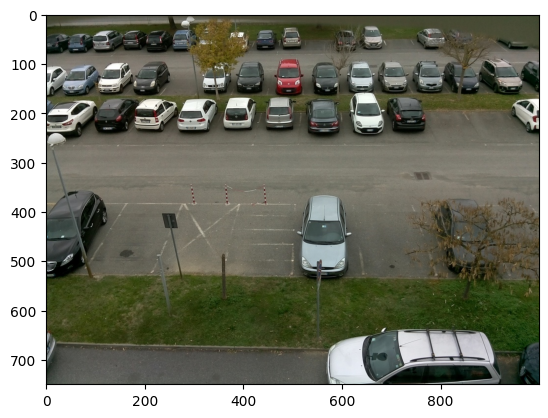

In [12]:
img = cv.imread(r"D:\CNR-EXT_FULL_IMAGE_1000x750\FULL_IMAGE_1000x750\OVERCAST\2015-11-20\camera6\2015-11-20_1347.jpg")
plt.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))

img_rain = cv.imread(r"D:\CNR-EXT_FULL_IMAGE_1000x750\FULL_IMAGE_1000x750\RAINY\2015-11-21\camera6\2015-11-21_1247.jpg")

In [5]:
t1 = 0 
def on_trackbar_t1(value):
    global t1
    t1 = value
    #print("Current Trackbar Value:", t1)
    return t1

t2 = 0 
def on_trackbar_t2(value):
    global t2
    t2 = value
    #print("Current Trackbar Value:", t2)
    return t2


cv.namedWindow('Canny') 


cv.createTrackbar('t1', 'Canny', 0, 500, on_trackbar_t1)
cv.createTrackbar('t2', 'Canny', 0, 500, on_trackbar_t2)

cv.imshow('Canny', img_rain)
cv.waitKey(1)

t1 = 0
t2 = 0
while(cv.getWindowProperty('Canny', cv.WND_PROP_VISIBLE)>=1):

    out_img = cv.Canny(img_rain, t1, t2, 3, L2gradient = False)
    cv.imshow('Canny', out_img)
    cv.waitKey(1)

print(t1)
print(t2)
cv.destroyAllWindows()

219
275


In [13]:
x0, y0 = 150, 250  
x1, y1 = 250, 350  

color = (0, 255, 0)  

thickness = 2

bbox = img[x0:x1, y0:y1]

bbox_w = bbox.shape[0]
bbox_h = bbox.shape[1]

# Draw bounding box in the image
img_with_bbox = cv.rectangle(img, (x0, y0), (x1, y1), color, thickness)

cv.imshow("ss", img_with_bbox)
cv.waitKey(0)
cv.destroyAllWindows()

gray = cv.cvtColor(bbox, cv.COLOR_BGR2GRAY)

# Inizialize SIFT
sift = cv.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints, descriptors = sift.detectAndCompute(gray, None)
image_with_keypoints = cv.drawKeypoints(bbox, keypoints, None)

# Visualize image with keypoints
cv.imshow('SIFT Keypoints', image_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

import os

cartella_busy = "C:\\Users\\elisa\\OneDrive\\Desktop\\Lab_CV\\progetto\\park\\CNRPark-Patches-150x150\\A\\busy"

files_jpg = []
files_immagini = []
immaginiB = []
immaginiF = []

for file in os.listdir(cartella_busy):
    if file.lower().endswith('.jpg'):
        files_immagini.append(file)
        percorso_completo_busy = os.path.join(cartella_busy, file)
        img = cv.imread(percorso_completo_busy)
        immaginiB.append(img)

busy = 0
free = 0

for i in range (0, len(immaginiB)):
    
    img_b = immaginiB[i]

    new_size = (bbox_w, bbox_h)

    img_busy = cv.resize(img_b, new_size, interpolation=cv.INTER_LINEAR)
    
    grayB = cv.cvtColor(img_busy, cv.COLOR_RGB2GRAY)

    # Inizialize SIFT
    siftB = cv.SIFT_create()
    
    # Find keypoints and descriptors with SIFT
    keypointsB, descriptorsB = siftB.detectAndCompute(grayB, None)
 
    bfB = cv.BFMatcher()
    # Find correspondances between the slot descriptors and the busy descriptors
    matches_B = bfB.knnMatch(descriptors, descriptorsB, k=2)
    
    # Filter correspondances using Lowe's ratio
    good_matches_B = []
    for m, n in matches_B:
        if m.distance < 0.8 * n.distance:
            good_matches_B.append(m)
            busy = busy + 1
print("busy counter: ", busy)

cartella_free = "C:\\Users\\elisa\\OneDrive\\Desktop\\Lab_CV\\progetto\\park\\CNRPark-Patches-150x150\\A\\free"

for file in os.listdir(cartella_free):
    if file.lower().endswith('.jpg'):
        files_immagini.append(file)
        percorso_completo_free = os.path.join(cartella_free, file)
        img = cv.imread(percorso_completo_free)
        immaginiF.append(img)

for i in range (0, len(immaginiF)):
    
    img_f = immaginiF[i]

    new_size = (bbox_w, bbox_h)

    img_free = cv.resize(img_f, new_size, interpolation=cv.INTER_LINEAR)
    
    grayF = cv.cvtColor(img_free, cv.COLOR_RGB2GRAY)

    # Inizialize SIFT
    siftF = cv.SIFT_create()
    
    # Find keypoints and descriptors with SIFT
    keypointsF, descriptorsF = siftF.detectAndCompute(grayF, None)

    if descriptorsF is not None:
        descriptors = descriptors.astype(np.float32)
        descriptorsF = descriptorsF.astype(np.float32)

        bfF = cv.BFMatcher()
    
        # Find correspondances between the slot descriptors and the free descriptors
        matches_F = bfF.knnMatch(descriptors, descriptorsF, k=2)
    
        if matches_F is not None:
            good_matches_F = []

            for match in matches_F:
                if len(match) == 2:
                    m, n = match
                if m.distance < 0.8 * n.distance:
                    good_matches_F.append(m)
                    free = free + 1
        
print("free counter: ", free)

if busy > free:
    print("the parking slot is BUSY")
else:
    print("the parking slot is FREE")


busy counter:  11988
free counter:  6614
the parking slot is BUSY
